# Projections

In [1]:
# -----------------------------------------------------------------------------
# Matplotlib cheat sheet
# Released under the BSD License
# -----------------------------------------------------------------------------
import numpy as np
import cartopy.crs
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.axes3d import Axes3D

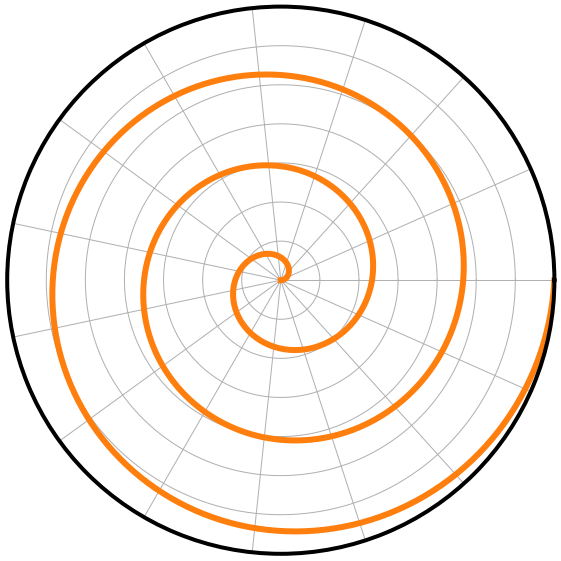

In [2]:
# Polar plot
# -----------------------------------------------------------------------------
mpl.rc('axes', linewidth=4.0)
fig = plt.figure(figsize=(8,8))
b = 0.025
ax = fig.add_axes([b,b,1-2*b,1-2*b], projection="polar")
T = np.linspace(0, 3*2*np.pi, 500)
R = np.linspace(0, 2, len(T))
ax.plot(T, R, color="C1", linewidth=6)
ax.set_xticks(np.linspace(0, 2*np.pi, 2*8))
ax.set_xticklabels([])
ax.set_yticks(np.linspace(0, 2, 8))
ax.set_yticklabels([])
ax.set_ylim(0,2)
ax.grid(linewidth=1)
# plt.savefig("../figures/projection-polar.pdf")
plt.show()
fig.clear()


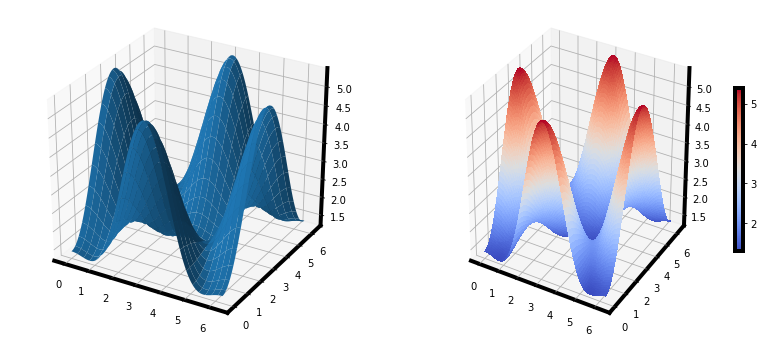

In [3]:
# 3D plot
# -----------------------------------------------------------------------------
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)

X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

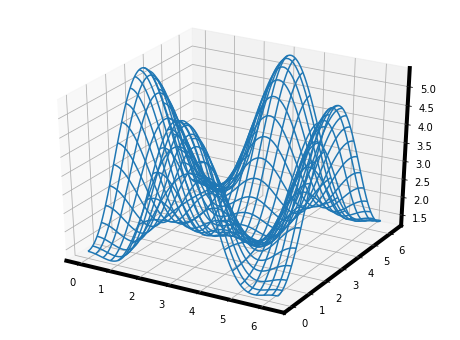

In [4]:
# Wire-Frame Plot
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

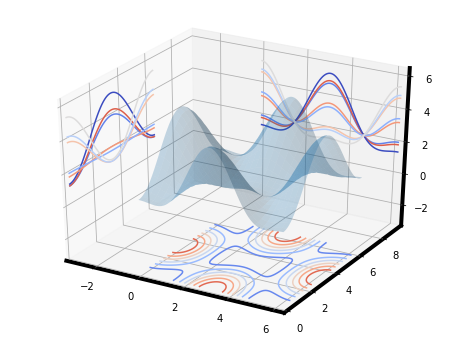

In [5]:
# Contour Plots with Projections
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

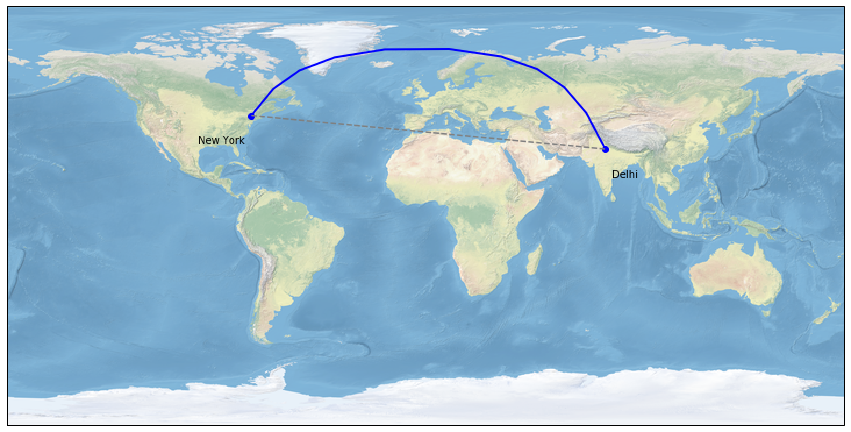

In [6]:
# Cartopy plot
# -----------------------------------------------------------------------------

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()